<a href="https://colab.research.google.com/github/ramandeep05252/Foodie-Bay/blob/main/FoodieBay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FoodieBay Model**


Objective: To find the factors that influence resturaunt ratings on a dataset provided by FoodieBay


By- Ramandeep Kaur


## **2.1 Importing Libraries**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, precision_recall_curve, classification_report
from sklearn.metrics import classification_report, confusion_matrix

## **2.2 Loading and Inspecting Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading dataset
records_A2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML A2/FoodieBay.csv")

#exploring the dataset
print(records_A2)

print('Sample size:', records_A2.shape[0])
print('Number of columns:', records_A2.shape[1])

                                                     url  \
0      https://www.zomato.com/bangalore/d2v-cafe-1-ba...   
1      https://www.zomato.com/bangalore/the-burger-pl...   
2      https://www.zomato.com/bangalore/millet-mama-b...   
3      https://www.zomato.com/bangalore/red-onion-sha...   
4      https://www.zomato.com/bangalore/chaiywaala-da...   
...                                                  ...   
40125  https://www.zomato.com/bangalore/yumlane-brook...   
40126  https://www.zomato.com/bangalore/american-dess...   
40127  https://www.zomato.com/bangalore/new-arya-bhav...   
40128  https://www.zomato.com/bangalore/le-charcoal-x...   
40129  https://www.zomato.com/bangalore/kaati-zone-ch...   

                                                 address                 name  \
0      173/218, GF, Opposite Ranka Colony, Bannerghat...             D2V Cafe   
1      2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...     The Burger Place   
2      Next To Surana College, South

In [ ]:
print(records_A2.info())
print(records_A2.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 40130 non-null  object 
 1   address             40130 non-null  object 
 2   name                40130 non-null  object 
 3   phone               39246 non-null  object 
 4   location            40130 non-null  object 
 5   rest_type           40130 non-null  object 
 6   cuisines            40112 non-null  object 
 7   menu_item           40130 non-null  object 
 8   listed_in_type      40130 non-null  object 
 9   listed_in_city      40130 non-null  object 
 10  online_order        40130 non-null  object 
 11  book_table          40130 non-null  object 
 12  ave_cost_for_two    39890 non-null  float64
 13  dish_liked          17351 non-null  object 
 14  votes               40130 non-null  int64  
 15  ave_review_ranking  33751 non-null  float64
 16  rate

### **Inspecting and treating missing data**

In [ ]:
#finindg missing values
print(records_A2.isnull().sum().sort_values(ascending=0))

dish_liked            22779
rate                   8336
ave_review_ranking     6379
phone                   884
ave_cost_for_two        240
cuisines                 18
online_order              0
votes                     0
book_table                0
url                       0
listed_in_city            0
address                   0
menu_item                 0
rest_type                 0
location                  0
name                      0
listed_in_type            0
dtype: int64


In [ ]:
# Replacing empty strings (" ") with NaN
records_A2.replace(" ", pd.NA, inplace=True)

<Axes: xlabel='rate', ylabel='Count'>

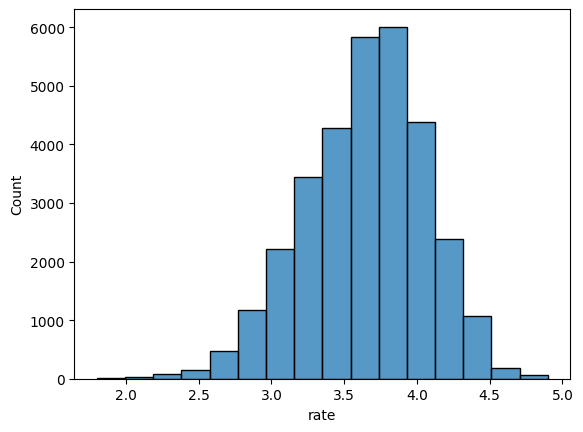

In [ ]:
#creating histogram and boxplots for all missing columns
sns.histplot(data= records_A2, x='rate', bins= 16)

<Axes: xlabel='rate'>

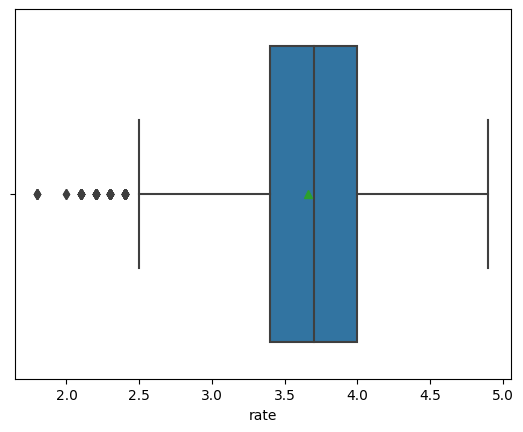

In [ ]:
Box_Bin= 0.8
sns.boxplot(data=records_A2, x='rate', showmeans=True, width= Box_Bin)

<Axes: xlabel='ave_review_ranking', ylabel='Count'>

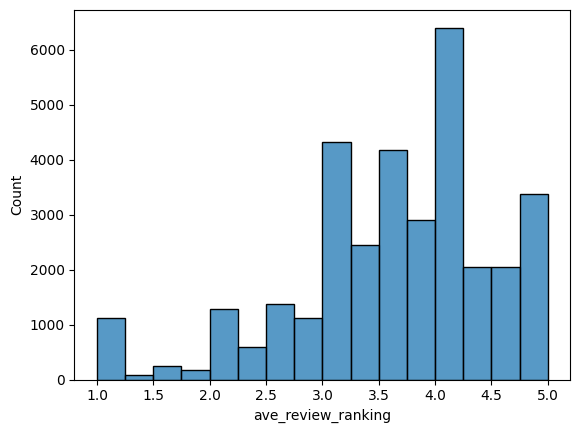

In [ ]:
sns.histplot(data= records_A2, x='ave_review_ranking', bins= 16)

<Axes: xlabel='ave_review_ranking'>

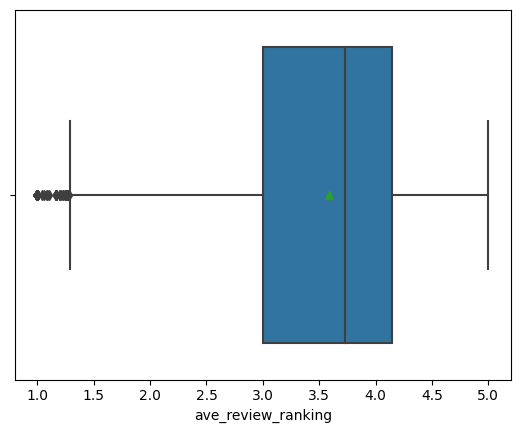

In [ ]:
Box_Bin= 0.8
sns.boxplot(data=records_A2, x='ave_review_ranking', showmeans=True, width= Box_Bin)

<Axes: xlabel='ave_cost_for_two', ylabel='Count'>

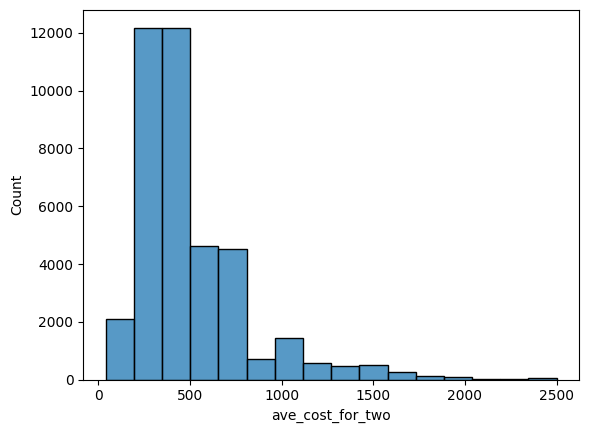

In [ ]:
sns.histplot(data= records_A2, x='ave_cost_for_two', bins= 16)

<Axes: xlabel='ave_cost_for_two'>

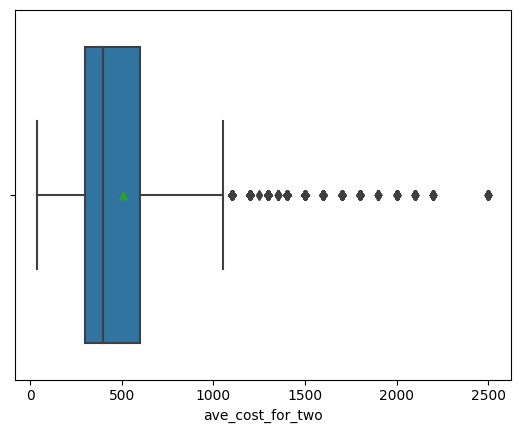

In [ ]:
Box_Bin= 0.8
sns.boxplot(data=records_A2, x='ave_cost_for_two', showmeans=True, width= Box_Bin)

In [ ]:
#replacing missing numerical data with median
records_A2['ave_review_ranking'].fillna(records_A2['ave_review_ranking'].median(), inplace=True)
records_A2['ave_cost_for_two'].fillna(records_A2['ave_cost_for_two'].median(), inplace=True)


In [ ]:
print(records_A2.isnull().sum().sort_values(ascending=0))

dish_liked            14551
phone                   634
cuisines                  8
url                       0
online_order              0
ave_review_ranking        0
votes                     0
ave_cost_for_two          0
book_table                0
listed_in_type            0
listed_in_city            0
address                   0
menu_item                 0
rest_type                 0
location                  0
name                      0
rate                      0
dtype: int64



**Converting Categorical variables to Numerical**

In [ ]:
#converting categorical data to numerical
def coding_onlineorder(x):
    if x=='Yes': return 1
    if x=='No': return 0

records_A2['online_order'] = records_A2['online_order'].apply(coding_intersection)


In [ ]:
#converting categorical data to numerical
def coding_booktable(x):
    if x=='Yes': return 1
    if x=='No': return 0

records_A2['book_table'] = records_A2['book_table'].apply(coding_intersection)


In [ ]:
def coding_rest_type(x):
    if x=='Bakery': return 1
    if x=='Cafe': return 2
    if x=='Casual Dining': return 3
    if x=='Casual Dining, Bar': return 4
    if x=='Delivery': return 5
    if x=='Quick Bites': return 6
    if x=='Takeaway, Delivery': return 7

records_A2['rest_type'] = records_A2['rest_type'].apply(coding_rest_type)


In [ ]:
def coding_listed_in_type(x):
    if x=='Buffet': return 1
    if x=='Cafes': return 2
    if x=='Delivery': return 3
    if x=='Desserts': return 4
    if x=='Dine-out': return 5
    if x=='Drinks & nightlife': return 6
    if x=='Pubs and bars': return 7

records_A2['listed_in_type'] = records_A2['listed_in_type'].apply(coding_listed_in_type)


In [ ]:
print(records_A2.sample(10))

                                                     url  \
30516  https://www.zomato.com/bangalore/sagar-fast-fo...   
13606  https://www.zomato.com/bangalore/tata-cha-kora...   
16829  https://www.zomato.com/bangalore/sip-n-bite-bo...   
26517  https://www.zomato.com/bangalore/pure-natural-...   
35386  https://www.zomato.com/bangalore/sukh-sagar-ja...   
16155  https://www.zomato.com/bangalore/donne-biryani...   
20330  https://www.zomato.com/bangalore/popz-kitchen-...   
20503  https://www.zomato.com/bangalore/millers-46-va...   
14651  https://www.zomato.com/bangalore/sweet-truth-h...   
11604  https://www.zomato.com/bangalore/biriyani-bhat...   

                                                 address  \
30516  702, 6th Cross, 3rd Block, Behind BDA Complex,...   
13606  58, Ground Floor, 7th Block, Raheja Arcade, Ko...   
16829  NGR Layout, Roopena Agrahara, Bommanahalli, Ba...   
26517  Near National College, 7th Block, Jayanagar, B...   
35386  30th Cross, 8th Main, Near Jain 

## **2.3 Exploratory Data Analysis EDA**


Univariate analysis

Bivariate analysis

Multivariate analysis

## Univariate Analysis

In [ ]:
records_A2['ave_review_ranking'].describe()



count   40130
mean        4
std         1
min         1
25%         3
50%         4
75%         4
max         5
Name: ave_review_ranking, dtype: float64

In [ ]:
records_A2['ave_cost_for_two'].describe()

count    31794.000000
mean       546.802416
std        338.913978
min         40.000000
25%        300.000000
50%        500.000000
75%        700.000000
max       2500.000000
Name: ave_cost_for_two, dtype: float64

In [ ]:
records_A2['votes'].describe()

count    31794.000000
mean       284.311065
std        659.501790
min          0.000000
25%         20.000000
50%         68.000000
75%        244.000000
max      12121.000000
Name: votes, dtype: float64

In [ ]:
records_A2['rate'].describe()

count    31794.000000
mean         3.657275
std          0.431129
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

Numerical Variables: ['rate', 'ave_cost_for_two', 'ave_review_ranking']


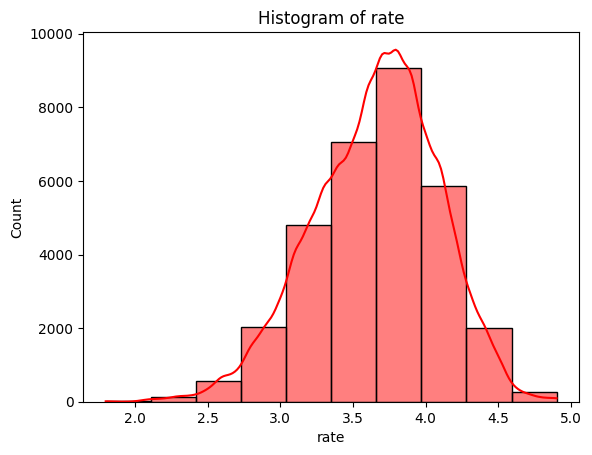

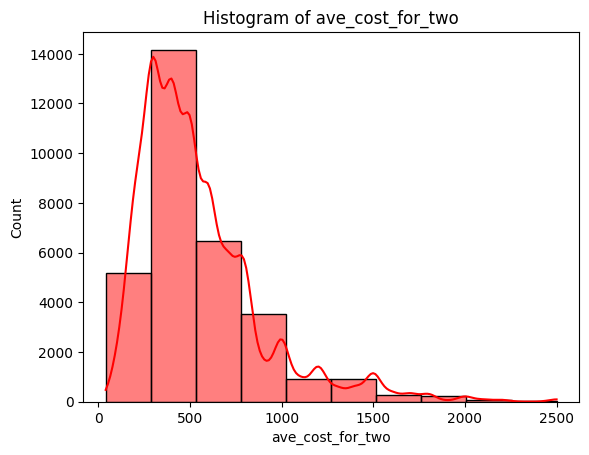

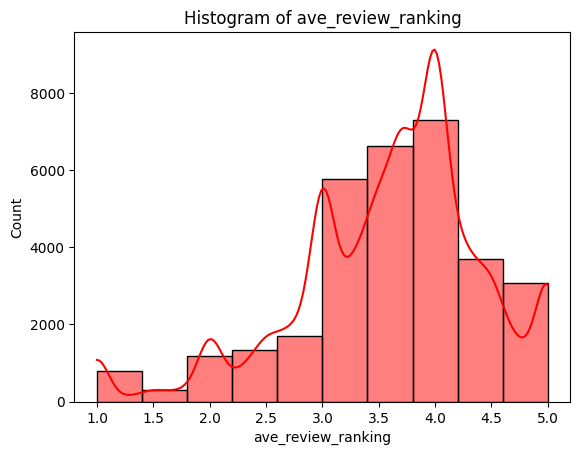

In [ ]:
# Using the numerical variables from the dataset
numerical_variables = ['rate', 'ave_cost_for_two', 'ave_review_ranking']

# Printing the list of numerical variables
print("Numerical Variables:", numerical_variables)

# Displaying histograms using seaborn
for variable in numerical_variables:
    sns.histplot(data=records_A2, x=variable, bins= 10, kde= True, color='red')
    plt.title(f"Histogram of {variable}")
    plt.show()

<Axes: xlabel='votes', ylabel='Count'>

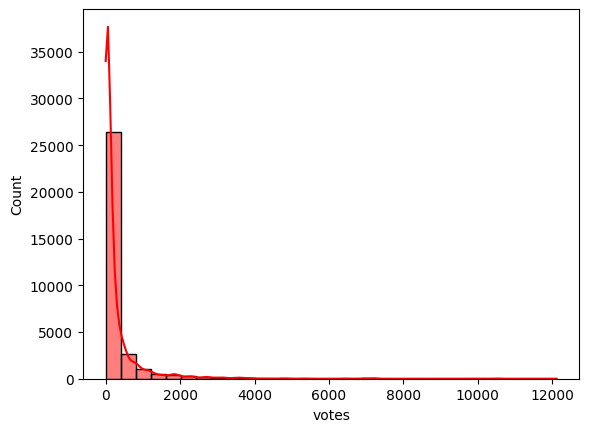

In [ ]:
sns.histplot(data=records_A2, x='votes', bins=30, kde=True,color='red')

Numerical Variables: ['listed_in_type', 'rest_type', 'online_order', 'book_table']


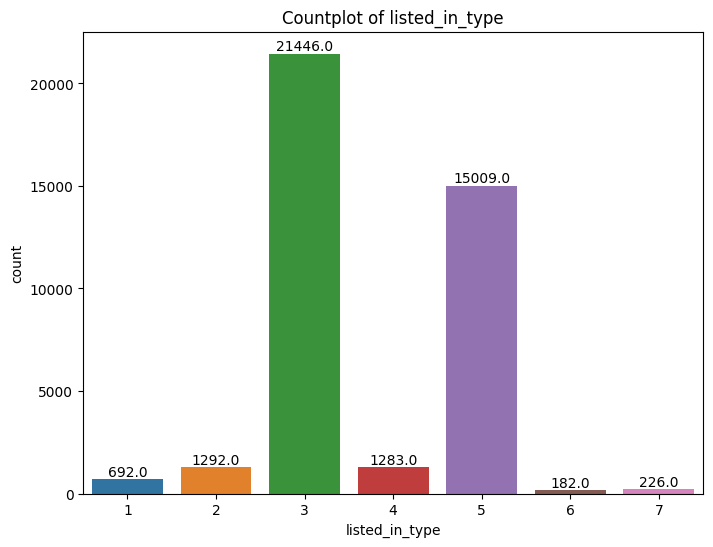

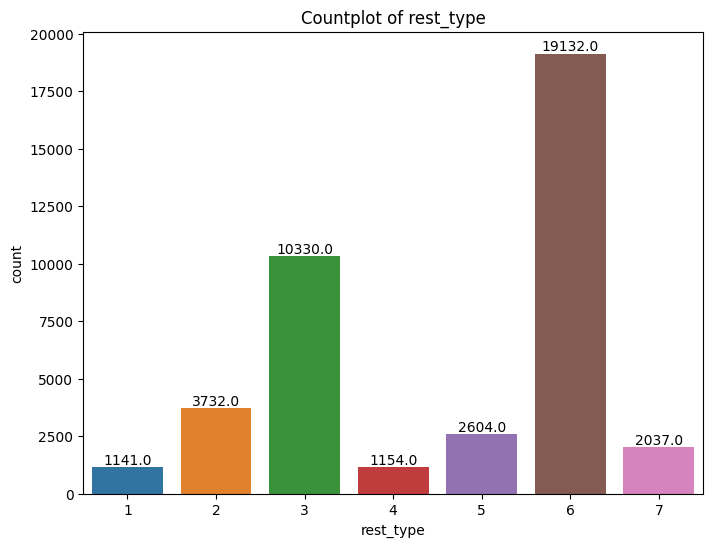

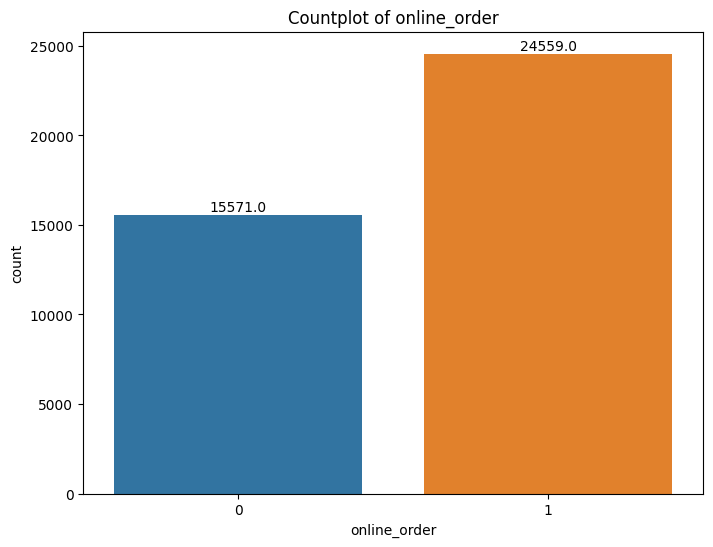

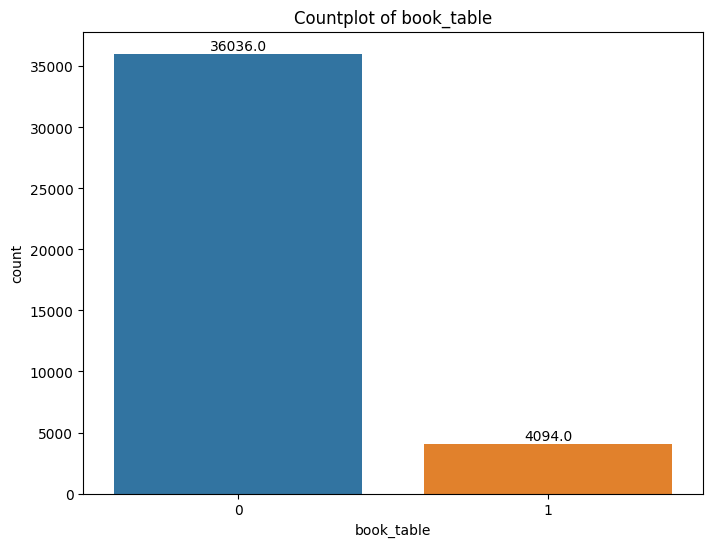

In [ ]:
# Using countplots to visualise the distribution of variables below
numerical_variables = ['listed_in_type', 'rest_type', 'online_order', 'book_table']

# Printing the list of numerical variables
print("Numerical Variables:", numerical_variables)

# Displaying histograms using seaborn
for variable in numerical_variables:
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    ax = sns.countplot(data=records_A2, x=variable)
    plt.title(f"Countplot of {variable}")

    # Adding count labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

## Bivariate Analysis

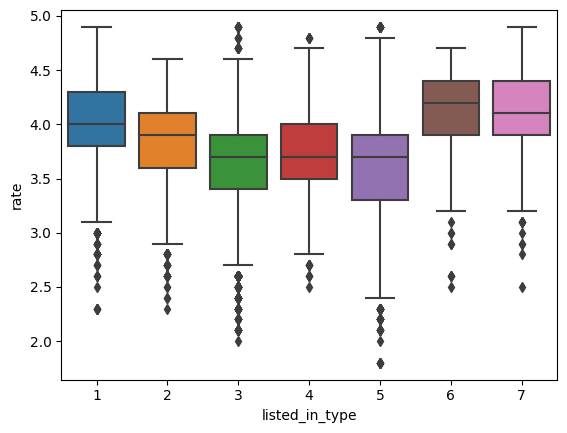

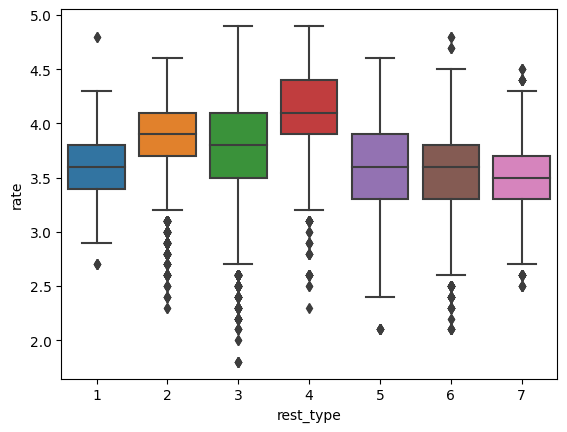

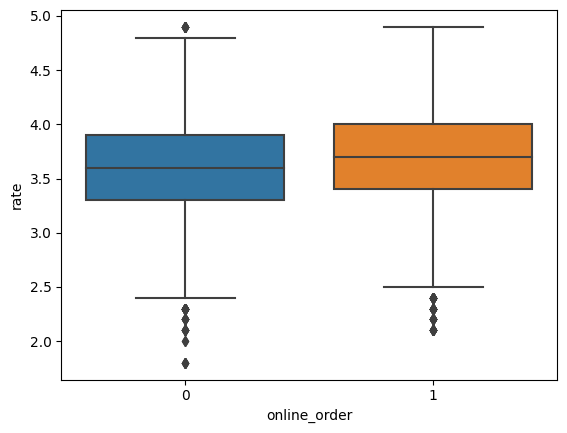

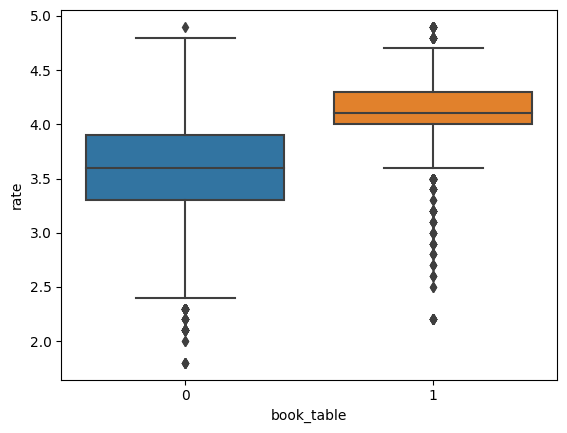

In [ ]:
num_variables=['listed_in_type', 'rest_type', 'online_order', 'book_table']
for i in num_variables:
    sns.boxplot(data= records_A2, x=i, y= 'rate')
    plt.show()

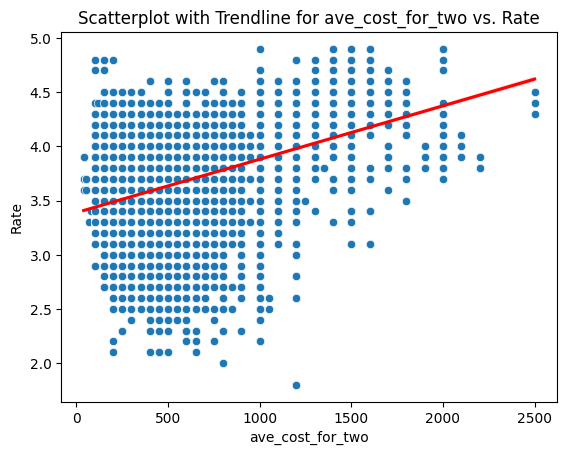

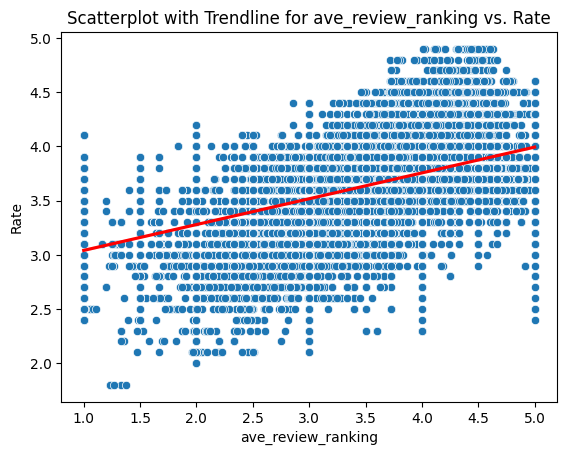

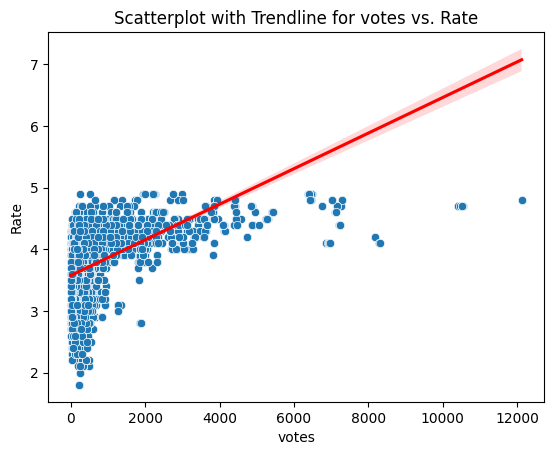

In [ ]:
num_variables = ['ave_cost_for_two', 'ave_review_ranking', 'votes']

for i in num_variables:
    sns.scatterplot(data=records_A2, x=i, y='rate')

    # Adding a trendline (regression line)
    sns.regplot(data=records_A2, x=i, y='rate', scatter=False, color='red')

    plt.title(f'Scatterplot with Trendline for {i} vs. Rate')
    plt.xlabel(i)
    plt.ylabel('Rate')

    plt.show()


<ipython-input-119-403e0c55b90d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=records_A2, x='rest_type', y='ave_cost_for_two', ci=None, palette='Set2')


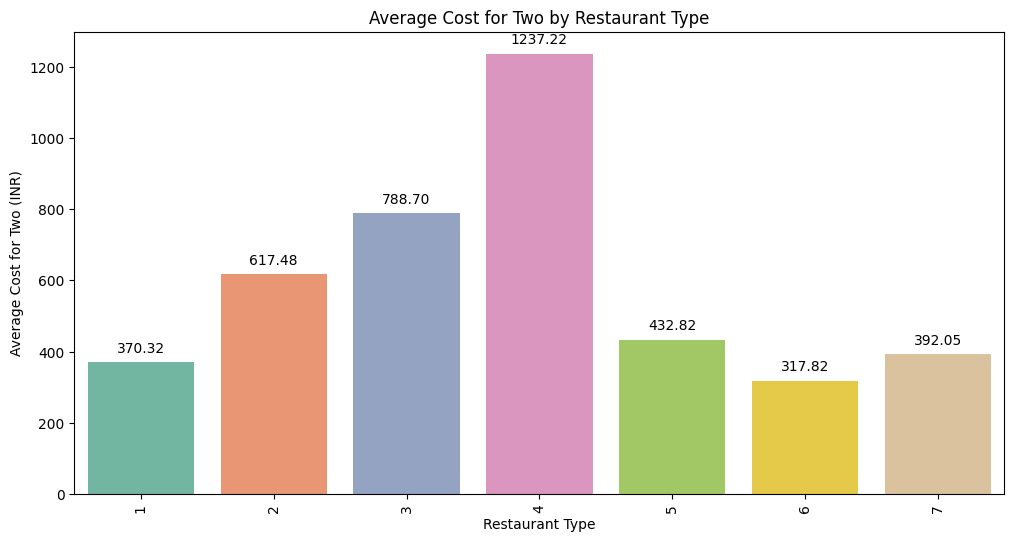

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=records_A2, x='rest_type', y='ave_cost_for_two', ci=None, palette='Set2')

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Restaurant Type')
plt.ylabel('Average Cost for Two (INR)')
plt.title('Average Cost for Two by Restaurant Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
df = pd.DataFrame(records_A2)

# Sorting the DataFrame by ratings in descending order to find the best-performing restaurants
best_performing = df.sort_values(by='rate', ascending=False)

worst_performing = df.sort_values(by='rate')

# Extracting just the names of the best-performing and worst-performing restaurants
best_names = best_performing['name'].tolist()
worst_names = worst_performing['name'].tolist()

print("Best-Performing Restaurants:")
print(best_names)
print(worst_names)


Best-Performing Restaurants:
['Asia Kitchen By Mainland China', 'Asia Kitchen By Mainland China', 'Flechazo', 'Asia Kitchen By Mainland China', 'Punjab Grill', "AB's - Absolute Barbecues", "AB's - Absolute Barbecues", 'Flechazo', 'Asia Kitchen By Mainland China', "AB's - Absolute Barbecues", 'Asia Kitchen By Mainland China', 'Asia Kitchen By Mainland China', "AB's - Absolute Barbecues", 'Asia Kitchen By Mainland China', 'Asia Kitchen By Mainland China', 'Asia Kitchen By Mainland China', 'Asia Kitchen By Mainland China', 'Asia Kitchen By Mainland China', 'Asia Kitchen By Mainland China', 'Asia Kitchen By Mainland China', 'Asia Kitchen By Mainland China', 'Asia Kitchen By Mainland China', "AB's - Absolute Barbecues", 'SantÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Spa Cuisine', 'Punjab Grill', "AB's - Absolute Barbecues", "AB's - Absolute Barbecues", 'Flechazo', 'Punjab Gril

In [ ]:
df = pd.DataFrame(records_A2)

# Counting the number of restaurants in each city
city_counts = df['location'].value_counts()

# Finding the city with the greatest number of restaurants
greatest_city = city_counts.idxmax()
max_restaurants = city_counts.max()
print(greatest_city)
print(max_restaurants)

BTM
4422


## Multivariate Analysis

<ipython-input-122-767580e363b3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=records_A2.corr(),  cmap='Blues', annot=True)


<Axes: >

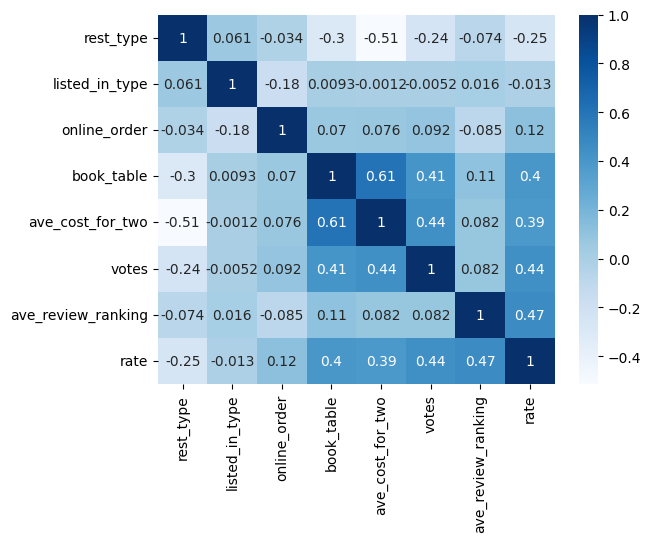

In [ ]:
#creating a heatmap showing correlation between all variables
sns.heatmap(data=records_A2.corr(),  cmap='Blues', annot=True)

In [ ]:
# Dropping missing values in rate after performing all visualisations

records_A2.dropna(subset=['rate'], inplace=True)

## **2.4 Supervised Machine Learning Model**


**Linear Regression Model**

In [ ]:
#selecting relevant features and train and evaluate a model. For example
features=['online_order', 'book_table','ave_cost_for_two', 'ave_review_ranking','votes']
X=records_A2[features]
X.head()

,online_order,book_table,ave_cost_for_two,ave_review_ranking,votes
0,0,0,700,5,13
1,1,0,400,4,28
2,1,0,200,4,18
3,1,1,1200,5,550
4,1,0,250,3,67


In [ ]:
#specifying the label
y=records_A2['rate']
y.head()


0   4
1   4
2   4
3   4
4   4
Name: rate, dtype: float64

In [ ]:
print(records_A2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31794 entries, 0 to 40129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 31794 non-null  object 
 1   address             31794 non-null  object 
 2   name                31794 non-null  object 
 3   phone               31160 non-null  object 
 4   location            31794 non-null  object 
 5   rest_type           31794 non-null  int64  
 6   cuisines            31786 non-null  object 
 7   menu_item           31794 non-null  object 
 8   listed_in_type      31794 non-null  int64  
 9   listed_in_city      31794 non-null  object 
 10  online_order        31794 non-null  int64  
 11  book_table          31794 non-null  int64  
 12  ave_cost_for_two    31794 non-null  float64
 13  dish_liked          17243 non-null  object 
 14  votes               31794 non-null  int64  
 15  ave_review_ranking  31794 non-null  float64
 16  rate

## **2.4.1 Split the dataset**

In [ ]:
# Spliting dataset into training set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape)
print('Test dataset size:',X_test.shape)


       online_order  book_table  ave_cost_for_two  ave_review_ranking  votes
31057             1           0               300                   4     12
24957             1           0               250                   1      8
12362             1           0               150                   2      7
9844              1           0               300                   3     39
15403             0           0               300                   3     17
31057   3
24957   3
12362   3
9844    4
15403   4
Name: rate, dtype: float64
Training dataset size: (25435, 5)
Test dataset size: (6359, 5)


### **2.4.1.1. Train a linear model**

In [ ]:


#import linear_model
from sklearn import linear_model


reg = linear_model.LinearRegression()

In [ ]:
# Train a Regression model (regressor) with the training dataset
reg=reg.fit(X_train, y_train)

### **2.4.1.2 Make predictions**
Make predictions using the model and the test set

In [ ]:
#Making predictions for the test dataset
y_pred = reg.predict(X_test)


**Inspect the predictions and the original labels**

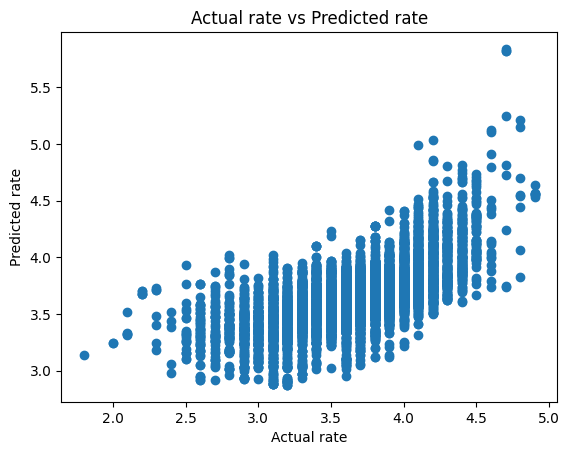

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual rate")
plt.ylabel("Predicted rate")
plt.title("Actual rate vs Predicted rate")
plt.show()

In [ ]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.0f' % x)
area=X_test[features]
#inspection
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

inspection.head(20)

,Actual,Predicted
15646,3,3
19014,4,4
24330,3,4
2873,4,4
16518,4,4
14396,4,4
9936,4,4
32874,4,4
31844,4,5
24289,3,4


### **2.4.1.3 Performance evaluation**

In [ ]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)              # R-squared

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.10491712920181337
R-squared (R2): 0.43779909157017494


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate and print the root mean square error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error: {rmse}")

Root Mean Square Error: 0.3239091372620003


In [ ]:
#Examining the performance using the descriptive stats of price
inspection['Actual'].describe()

count   6359
mean       4
std        0
min        2
25%        3
50%        4
75%        4
max        5
Name: Actual, dtype: float64

In [ ]:
#Examining the performance using the descriptive stats of predicted price
inspection['Predicted'].describe()

count   6359
mean       4
std        0
min        3
25%        3
50%        4
75%        4
max        6
Name: Predicted, dtype: float64

#Decision Tree Regression Model

In [ ]:
#Importing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
#instantiate a decision tree regressor and fit it with the training data
regressor = DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

regressor

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

In [ ]:
#predict prices
y_pred = regressor.predict(X_test)


## **2.4.2.1 Evaluate the model performance**


In [ ]:
#Evaluate the model
from sklearn import metrics
print('Mean Absolute Error:', '%.3f' % metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', '%.3f' % metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', '%.3f' %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.204
Mean Squared Error: 0.081
Root Mean Squared Error: 0.285


In [ ]:
print("R-squared: %.3f" % metrics.r2_score(y_test, y_pred))

R-squared: 0.565


In [ ]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
inspection['Actual'].describe()

count   6359
mean       4
std        0
min        2
25%        3
50%        4
75%        4
max        5
Name: Actual, dtype: float64

In [ ]:
inspection['Predicted'].describe()

count   6359
mean       4
std        0
min        3
25%        3
50%        4
75%        4
max        6
Name: Predicted, dtype: float64

## **2.4.2.2 Visualise the trees**

Not all classification machine learning models can be visualised.

In [ ]:
#Importing plot_tree to  extract rules and visualise the decition tree model
from sklearn.tree import plot_tree, export_text
from pandas.io.parsers.readers import annotations


In [ ]:
# Converting feature_names to a list if it's an Index object
feature_names = list(features) if isinstance(features, pd.Index) else features

# Extract the decision rules
rules = export_text(regressor, feature_names=feature_names)
print(rules)

|--- votes <= 137.50
|   |--- ave_review_ranking <= 3.29
|   |   |--- ave_review_ranking <= 2.91
|   |   |   |--- online_order <= 0.50
|   |   |   |   |--- value: [3.06]
|   |   |   |--- online_order >  0.50
|   |   |   |   |--- value: [3.23]
|   |   |--- ave_review_ranking >  2.91
|   |   |   |--- value: [3.39]
|   |--- ave_review_ranking >  3.29
|   |   |--- votes <= 17.50
|   |   |   |--- votes <= 8.50
|   |   |   |   |--- value: [3.34]
|   |   |   |--- votes >  8.50
|   |   |   |   |--- value: [3.49]
|   |   |--- votes >  17.50
|   |   |   |--- ave_review_ranking <= 3.56
|   |   |   |   |--- value: [3.58]
|   |   |   |--- ave_review_ranking >  3.56
|   |   |   |   |--- votes <= 48.50
|   |   |   |   |   |--- value: [3.69]
|   |   |   |   |--- votes >  48.50
|   |   |   |   |   |--- value: [3.85]
|--- votes >  137.50
|   |--- ave_review_ranking <= 3.26
|   |   |--- ave_review_ranking <= 2.66
|   |   |   |--- online_order <= 0.50
|   |   |   |   |--- value: [2.77]
|   |   |   |--- on

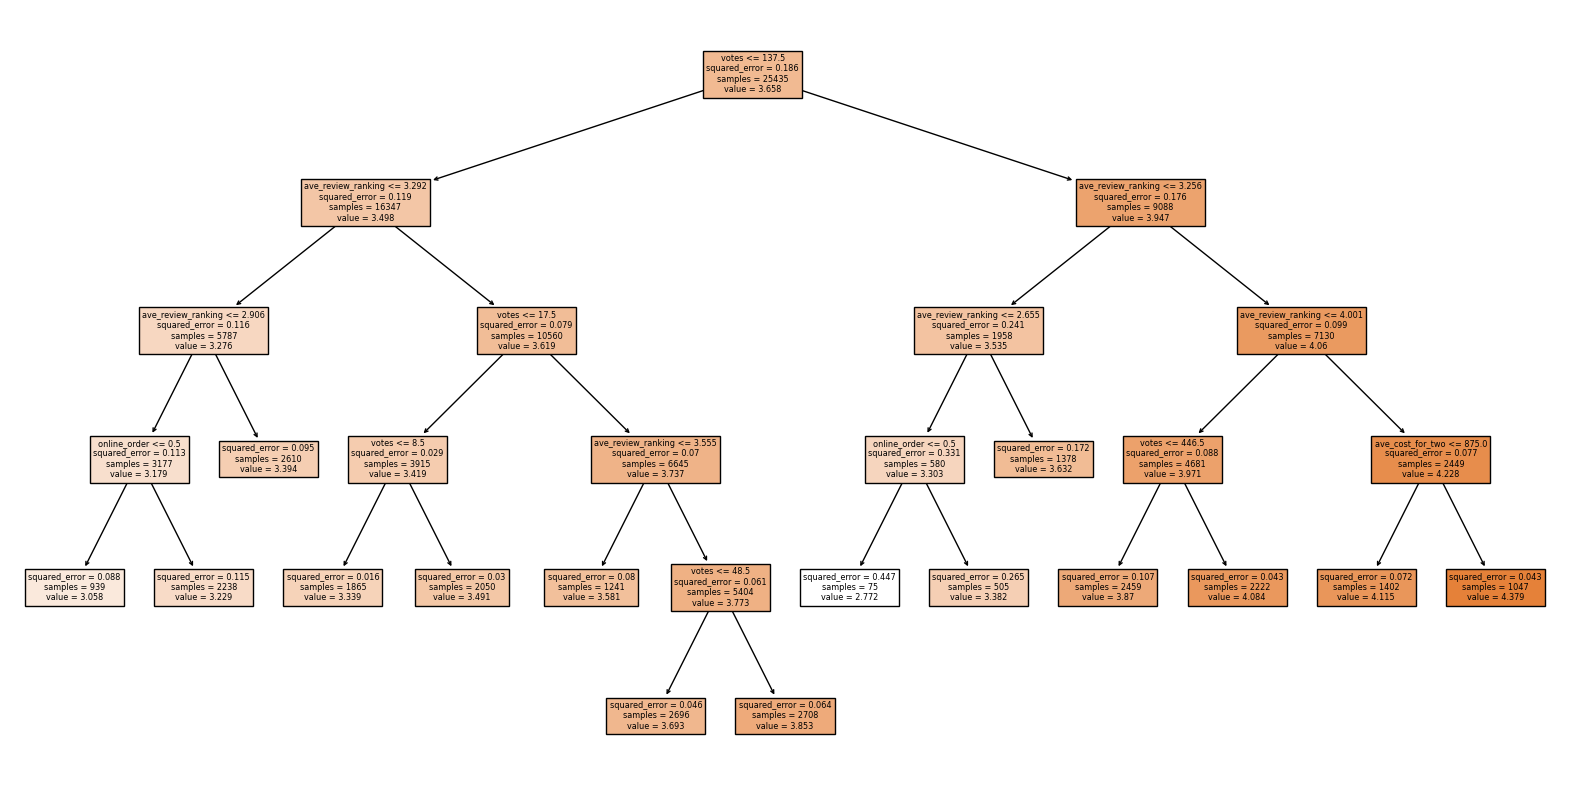

In [ ]:
# visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

#Unsupervised Learning
Clustering by Kmeans

In [ ]:
# Selecting features for clustering;

features_1=['online_order', 'book_table','ave_cost_for_two', 'ave_review_ranking','votes']


X = records_A2[features_1]

In [ ]:
X.describe()

,online_order,book_table,ave_cost_for_two,ave_review_ranking,votes
count,31794,31794,31794,31794,31794
mean,1,0,546,4,284
std,0,0,339,1,660
min,0,0,40,1,0
25%,0,0,300,3,20
50%,1,0,500,4,68
75%,1,0,700,4,244
max,1,1,2500,5,12121


In [ ]:
#import scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# using Min-Max Scaling to scale the features
scaler = MinMaxScaler()


In [ ]:
# Features to scale
features_to_scale = ['online_order', 'book_table','ave_cost_for_two', 'ave_review_ranking','votes' ]

# Fit and transform the features to scale on the training data
X_scaled_values = scaler.fit_transform(X)

# Create DataFrames from the scaled values
X_features_scaled = pd.DataFrame(X_scaled_values, columns=features_to_scale)
X_scaled = X_features_scaled



In [ ]:
X_scaled.describe()

,online_order,book_table,ave_cost_for_two,ave_review_ranking,votes
count,31794,31794,31794,31794,31794
mean,1,0,0,1,0
std,0,0,0,0,0
min,0,0,0,0,0
25%,0,0,0,0,0
50%,1,0,0,1,0
75%,1,0,0,1,0
max,1,1,1,1,1



---



## **2.5. K-Means clustering**

### **Model building**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Fit K-means clustering model with a 'guessed' number of clusters
k=5
kmeans = KMeans(n_clusters=k, n_init='auto',max_iter=300, random_state=2023)

#fit kmeans with X_scaled
kmeans.fit(X_scaled)

# Add cluster labels to original dataset
records_A2['Cluster'] = kmeans.labels_

## **2.6. Clustering Evaluation**
* Within-Cluster Sum of Squares
* Silhouette score


###**Within-Cluster Sum of Squares**
Within-Cluster Sum of Squares (WCSS) is the sum of the squared distance (Sum of Squared Errors SSE) between each data point and its assigned cluster center.

WCSS measures the compactness of the clusters, with lower values indicating tighter and more compact clusters.


In [ ]:
# Evaluating the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)


Within-Cluster Sum of Squares (WCSS): 1249.968


### **The Davies-Bouldin Index (DBI)**  

Davies-Bouldin index measures the ratio of the within-cluster compactness to the between-cluster separation (with the closest cluster). Lower values of the index indicate better clustering.


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

Davies Bouldin index: 0.560


### **Silhouette score**

measures how well-separated the clusters are, and how similar the data points are within each cluster.



> *  0.7 or higher: the  clustering is good.
> *  0.5 to 0.7: the clustering is fair.
> *  below 0.5: clustering is poor.



In [ ]:
# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Silhouette score: 0.567


In [ ]:
#Import funtions to visualise silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.cm as cm

In [ ]:
#fiting kmeans with X_scaled to get labels
cluster_labels = kmeans.fit_predict(X_scaled)

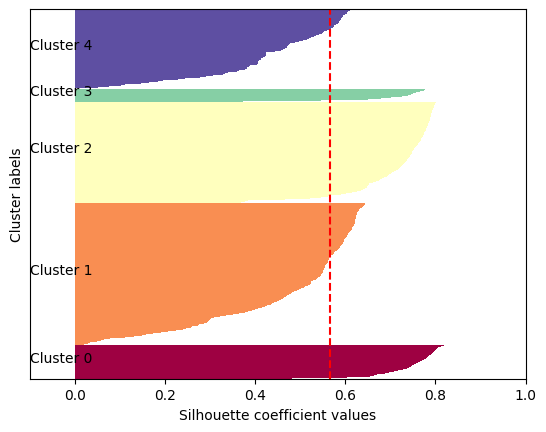

In [ ]:
# Compute silhouette scores
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Plot silhouette diagram
n_clusters = 5
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0

# Define the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet
cmap = cm.Spectral

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

plt.show()

## **2.7. Optimising k**


### **Use the elbow method based on the SSE (WCSS) score**





In [ ]:
# Determine optimal number of clusters using the SSE metric
sse_scores = []
best_k=2
best_sse_score=4622.613
for i in range(2, 41):
  kmeans = KMeans(n_clusters=i, n_init=2)
  kmeans.fit(X_scaled)
  sse_score_i=kmeans.inertia_
  sse_scores.append(sse_score_i)
  if best_sse_score > sse_score_i:
    best_k = i
    best_sse_score = sse_score_i

print('Best k: ', best_k)
print('Best within cluster sum of squarred error score: ', '%.3f' %best_sse_score)

Best k:  40
Best within cluster sum of squarred error score:  189.192


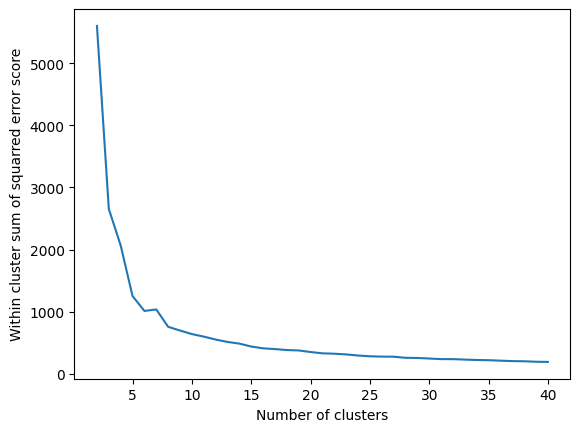

In [ ]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sse_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squarred error score")
plt.show()

### **Optimise the number of clusters based on the silhouette score**

We can also plot the Silhouette Score against k and look for the "elbow" or the point where the Silhouette Score starts to diminish.

The Silhouette Score ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. We should look for the number of clusters that gives the highest average Silhouette Score.

In [ ]:
# Determining optimal number of clusters using silhouette score
sil_scores = []
best_k=2
best_sil_score=0
for i in range(2, 41):
  kmeans = KMeans(n_clusters=i, n_init=2)
  kmeans.fit(X_scaled)
  sil_score_i=silhouette_score(X_scaled, kmeans.labels_)
  sil_scores.append(sil_score_i)
  if best_sil_score < sil_score_i:
    best_k = i
    best_sil_score = sil_score_i

print('Best k: ', best_k)
print('Best silhouette score: ', '%.3f' %best_sil_score)

Best k:  4
Best silhouette score:  0.729


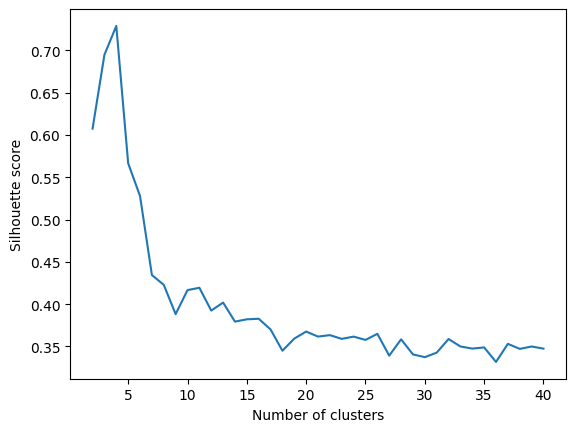

In [ ]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sil_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()



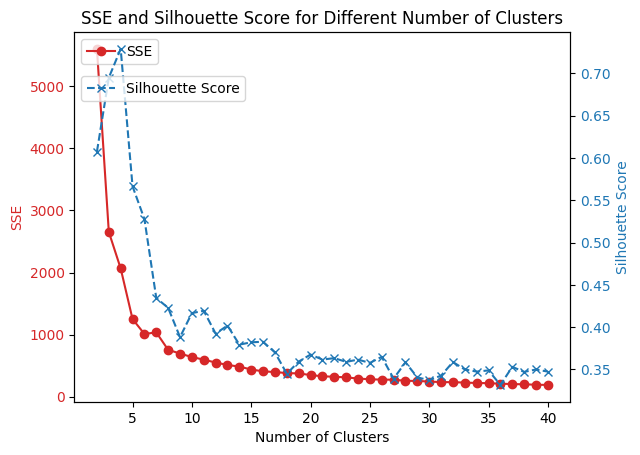

In [ ]:
# Create a figure and a set of subplots (two y-axes)
fig, ax1 = plt.subplots()

cluster_range = range(2, 41)

# Plot SSE
color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('SSE', color=color)
ax1.plot(cluster_range, sse_scores, marker='o', label='SSE', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the second y-axis to plot Silhouette Score
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(cluster_range, sil_scores, marker='x', linestyle='--', label='Silhouette Score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show legend
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.9))

# Show plot
plt.title("SSE and Silhouette Score for Different Number of Clusters")
plt.show()

## **2.8 Model Selection**

'Model' denotes the representation or structure that the algorithm has learned from the data.

In [ ]:
# let's go with k=4
n_clusters= 4

In [ ]:
# initialise the model object
kmeans = KMeans(n_clusters=best_k,n_init='auto', random_state=2023)

#Fit K-means clustering model with the selected number of clusters
kmeans.fit(X_scaled)


KMeans(n_clusters=4, n_init='auto', random_state=2023)

In [ ]:
# Add cluster labels to original dataset
records_A2['Cluster'] = kmeans.labels_

In [ ]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)


Within-Cluster Sum of Squares (WCSS): 1838.361
Davies Bouldin index: 0.405
Silhouette score: 0.729


**Let's create the silhouette plot**

<ipython-input-80-91266c7e9823>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Spectral")


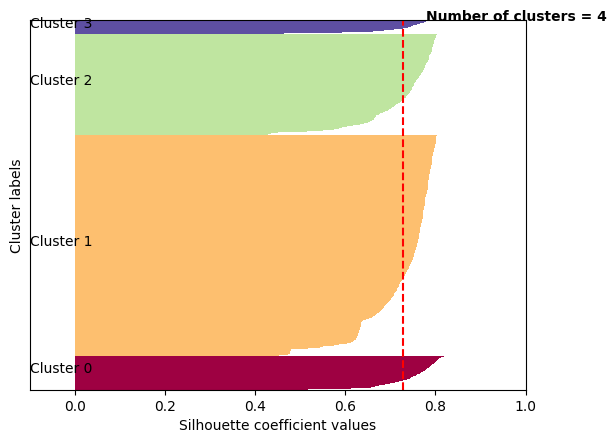

In [ ]:
# Compute sample silhouette scores
cluster_labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Create a color map
cmap = cm.get_cmap("Spectral")

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

# Plot silhouette diagram
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

ax.text(silhouette_avg + 0.05, len(X_scaled) + 5, "Number of clusters = %d" % n_clusters, fontsize=10, fontweight='bold')

plt.show()

## **2.9 Post-analysis for Cluster Profiling**

In [ ]:
records_A2[['online_order', 'book_table','ave_cost_for_two', 'ave_review_ranking','votes']]

,online_order,book_table,ave_cost_for_two,ave_review_ranking,votes
0,0,0,700,5,13
1,1,0,400,4,28
2,1,0,200,4,18
3,1,1,1200,5,550
4,1,0,250,3,67
...,...,...,...,...,...
40125,0,0,500,2,25
40126,1,0,500,3,23
40127,0,0,300,3,23
40128,1,0,500,4,162


In [ ]:
cluster_count=records_A2.Cluster.value_counts()
cluster_count

1    19064
2     8730
0     2871
3     1129
Name: Cluster, dtype: int64

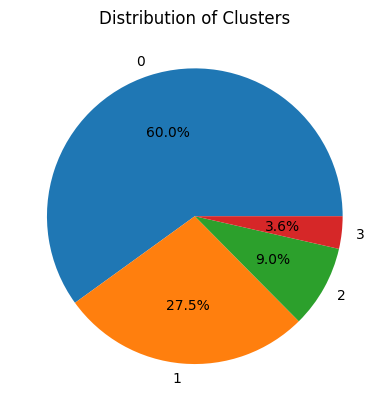

In [ ]:
#Let's generate a pie chart with the distribution of churned cases, along with percentage labels.

# Sort the index to ensure the clusters are in order
sorted_cluster_count = cluster_count.sort_index()

colours = sns.color_palette("tab10", n_colors=len(cluster_count))

plt.pie(cluster_count, labels=sorted_cluster_count.index, autopct='%1.1f%%', colors= colours)
plt.title('Distribution of Clusters')
plt.show()

In [ ]:
records_A2.groupby('Cluster')['online_order'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2871,1,0,1,1,1,1,1
1,19064,1,0,1,1,1,1,1
2,8730,0,0,0,0,0,0,0
3,1129,0,0,0,0,0,0,0


In [ ]:
records_A2.groupby('Cluster')['book_table'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2871,1,0,1,1,1,1,1
1,19064,0,0,0,0,0,0,0
2,8730,0,0,0,0,0,0,0
3,1129,1,0,1,1,1,1,1


In [ ]:
records_A2.groupby('Cluster')['ave_cost_for_two'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2871,1040,364,300,800,1000,1300,2500
1,19064,468,226,40,300,400,600,2000
2,8730,467,281,50,300,400,600,2200
3,1129,1231,430,300,900,1100,1500,2500


In [ ]:
records_A2.groupby('Cluster')['ave_review_ranking'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2871,4,1,1,4,4,4,5
1,19064,4,1,1,3,4,4,5
2,8730,4,1,1,3,4,4,5
3,1129,4,1,1,4,4,4,5


In [ ]:
records_A2.groupby('Cluster')['votes'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2871,943,936,0,258,612,1368,6470
1,19064,205,460,0,24,73,211,8304
2,8730,140,447,0,9,25,77,7137
3,1129,1068,1706,8,174,455,1212,12121


In [ ]:
# Get centroids of the clusters
centroids = kmeans.cluster_centers_

# Display the centroids
for idx, centroid in enumerate(centroids):
    print(f"Cluster {idx} centroid values:")
    for feature, value in zip(features, centroid):
        print(f"  {feature}: {value:.2f}")
    print("\n")

# To identify importance, you can look at the difference between centroids
for idx, feature in enumerate(features):
    print(f"Range for {feature}: {max(centroid[idx] for centroid in centroids) - min(centroid[idx] for centroid in centroids):.2f}")

Cluster 0 centroid values:
  online_order: 1.00
  book_table: 1.00
  ave_cost_for_two: 0.41
  ave_review_ranking: 0.71
  votes: 0.08


Cluster 1 centroid values:
  online_order: 1.00
  book_table: -0.00
  ave_cost_for_two: 0.17
  ave_review_ranking: 0.63
  votes: 0.02


Cluster 2 centroid values:
  online_order: 0.00
  book_table: 0.00
  ave_cost_for_two: 0.17
  ave_review_ranking: 0.66
  votes: 0.01


Cluster 3 centroid values:
  online_order: 0.00
  book_table: 1.00
  ave_cost_for_two: 0.48
  ave_review_ranking: 0.73
  votes: 0.09


Range for online_order: 1.00
Range for book_table: 1.00
Range for ave_cost_for_two: 0.31
Range for ave_review_ranking: 0.10
Range for votes: 0.08


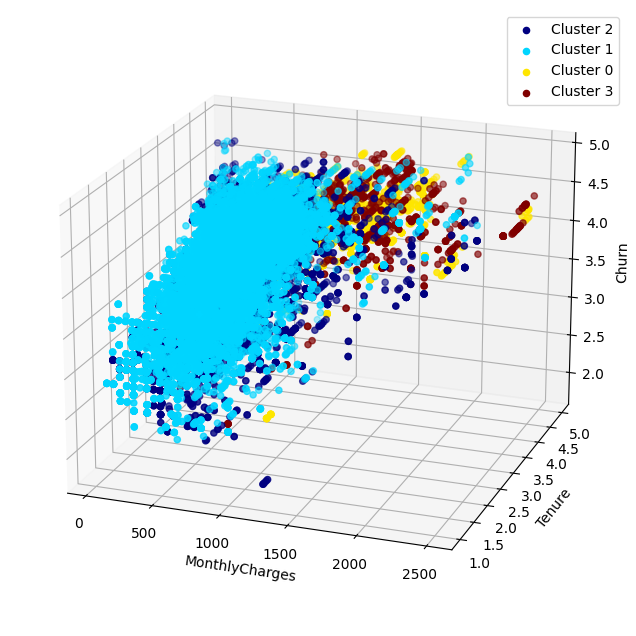

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(12, 8))

# Add 3D subplot
# The '111' means 1x1 grid, first subplot, similar to MATLAB-style
ax = fig.add_subplot(111, projection='3d')

# Unique cluster labels
unique_clusters = records_A2['Cluster'].unique()

# Color map
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters)))

# Adjusting the viewing angle for better visibility
ax.view_init(elev=20, azim=-70)  # Modify these values as needed

# Scatter plot for each cluster
for i, cluster in enumerate(unique_clusters):
    cluster_data = records_A2[records_A2['Cluster'] == cluster]
    ax.scatter(cluster_data['ave_cost_for_two'], cluster_data['ave_review_ranking'], cluster_data['rate'],
               label=f'Cluster {cluster}', c=[colors[i]])

# Legend and labels
ax.set_xlabel('MonthlyCharges')
ax.set_ylabel('Tenure')
ax.set_zlabel('Churn')
ax.legend()

# Show the plot
plt.show()



---



---

